In [28]:
from pathlib import Path
from typing import List
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [29]:
data_folder: Path = Path("../data")
benchmark_speed_file: Path = data_folder / "benchmark_results_2.txt"
benchmark_compression_file: Path = data_folder / "bits_per_int_2.csv"
sns.set(rc={'figure.figsize':(20,14)})
plt.tight_layout()

<Figure size 1440x1008 with 0 Axes>

## Preprocessing

In [30]:
benchmark_speeds: DataFrame = pd.read_csv(benchmark_speed_file, skiprows=9, skipfooter=1)
benchmark_speeds = benchmark_speeds.loc[~benchmark_speeds["name"].str.contains("write_BitsPerInt")]
benchmark_speeds["name"] = [lib.replace("SIMDCompressionAndIntersection", "SIMDCAI").replace("with_select", "with_direct") for lib in benchmark_speeds["name"]]

benchmark_speeds["input_data"] = [name.split("get_with_")[1] for name in benchmark_speeds["name"]]
benchmark_speeds["library"] = [name.split("/")[1].split("_benchmark")[0] for name in benchmark_speeds["name"]]
benchmark_speeds["process_type"] = [name.split("_benchmark_")[1].split("_get")[0] for name in benchmark_speeds["name"]]

# When we display all codecs, the plots get a bit full and messy. So we can filter them a bit
# and just display the codecs we want to see at the moment
filtered_fast_pfor_codecs: DataFrame = benchmark_speeds.loc[~(benchmark_speeds["library"].str.contains("fastPFOR"))]
only_fast_pfor: DataFrame = benchmark_speeds.loc[(benchmark_speeds["library"].str.contains("fastPFOR"))]
most_interesting_libraries: List[str] = ["turboPFOR_direct", "turboPFOR", "sdsl_lite_dac_vector", "fastPFOR_simdfastpfor128",
                                         "fastPFOR_simdbinarypacking", "maskedVByte"]
even_more_interesting_libraries = ["turboPFOR_direct", "turboPFOR", "fastPFOR_simdfastpfor128",
                                         "fastPFOR_simdbinarypacking"]
limited_to_interesting_libs: DataFrame = benchmark_speeds.loc[(benchmark_speeds["library"].isin(most_interesting_libraries))]
dataset_filtered: DataFrame = limited_to_interesting_libs
benchmark_speeds["lib"] = [name.split("_")[0] for name in benchmark_speeds["library"]]
benchmark_speeds

name  iterations  \
0     BenchmarkColumnCompressionFixture/unencoded_be...       66284   
1     BenchmarkColumnCompressionFixture/unencoded_be...       59963   
2     BenchmarkColumnCompressionFixture/unencoded_be...       66275   
3     BenchmarkColumnCompressionFixture/unencoded_be...       66921   
4     BenchmarkColumnCompressionFixture/unencoded_be...       72274   
...                                                 ...         ...   
2077  BenchmarkColumnCompressionFixture/SIMDCAI_vari...        9038   
2078  BenchmarkColumnCompressionFixture/SIMDCAI_vari...        9053   
2079  BenchmarkColumnCompressionFixture/SIMDCAI_vari...        6237   
2080  BenchmarkColumnCompressionFixture/SIMDCAI_vari...        8699   
2081  BenchmarkColumnCompressionFixture/SIMDCAI_vari...        7070   

      real_time   cpu_time time_unit  bytes_per_second  items_per_second  \
0      10695.90   10695.70        ns               NaN               NaN   
1      10622.00   10622.10        ns               NaN               NaN   
2      10567.80   10567.90        ns               NaN               NaN   
3       9872.39    9872.48        ns               NaN               NaN   
4       7651.63    7651.28        ns               NaN               NaN   
...         ...        ...       ...               ...               ...   
2077   72285.90   72283.00        ns               NaN               NaN   
2078   78143.60   78139.90        ns               NaN               NaN   
2079  113441.00  113427.00        ns               NaN               NaN   
2080   76257.20   76258.10        ns               NaN               NaN   
2081   99907.20   99900.90        ns               NaN               NaN   

      label  error_occurred  error_message  \
0       NaN             NaN            NaN   
1       NaN             NaN            NaN   
2       NaN             NaN            NaN   
3       NaN             NaN            NaN   
4       NaN             NaN            NaN   
...     ...             ...            ...   
2077    NaN             NaN            NaN   
2078    NaN             NaN            NaN   
2079    NaN             NaN            NaN   
2080    NaN             NaN            NaN   
2081    NaN             NaN            NaN   

                               input_data                       library  \
0                           small_numbers                     unencoded   
1                           small_numbers                     unencoded   
2               sequential_sorted_numbers                     unencoded   
3               sequential_sorted_numbers                     unencoded   
4                            huge_numbers                     unencoded   
...                                   ...                           ...   
2077          av_numbers_get_poslist_1000  SIMDCAI_varintgb_with_direct   
2078         av_numbers_get_poslist_10000  SIMDCAI_varintgb_with_direct   
2079         av_numbers_get_poslist_65000  SIMDCAI_varintgb_with_direct   
2080  av_numbers_get_poslist_10000_sorted  SIMDCAI_varintgb_with_direct   
2081  av_numbers_get_poslist_65000_sorted  SIMDCAI_varintgb_with_direct   

             process_type        lib  
0                encoding  unencoded  
1                decoding  unencoded  
2                encoding  unencoded  
3                decoding  unencoded  
4                encoding  unencoded  
...                   ...        ...  
2077  decoding_points_seq    SIMDCAI  
2078  decoding_points_seq    SIMDCAI  
2079  decoding_points_seq    SIMDCAI  
2080  decoding_points_seq    SIMDCAI  
2081  decoding_points_seq    SIMDCAI  

[2082 rows x 14 columns]

## Encoding

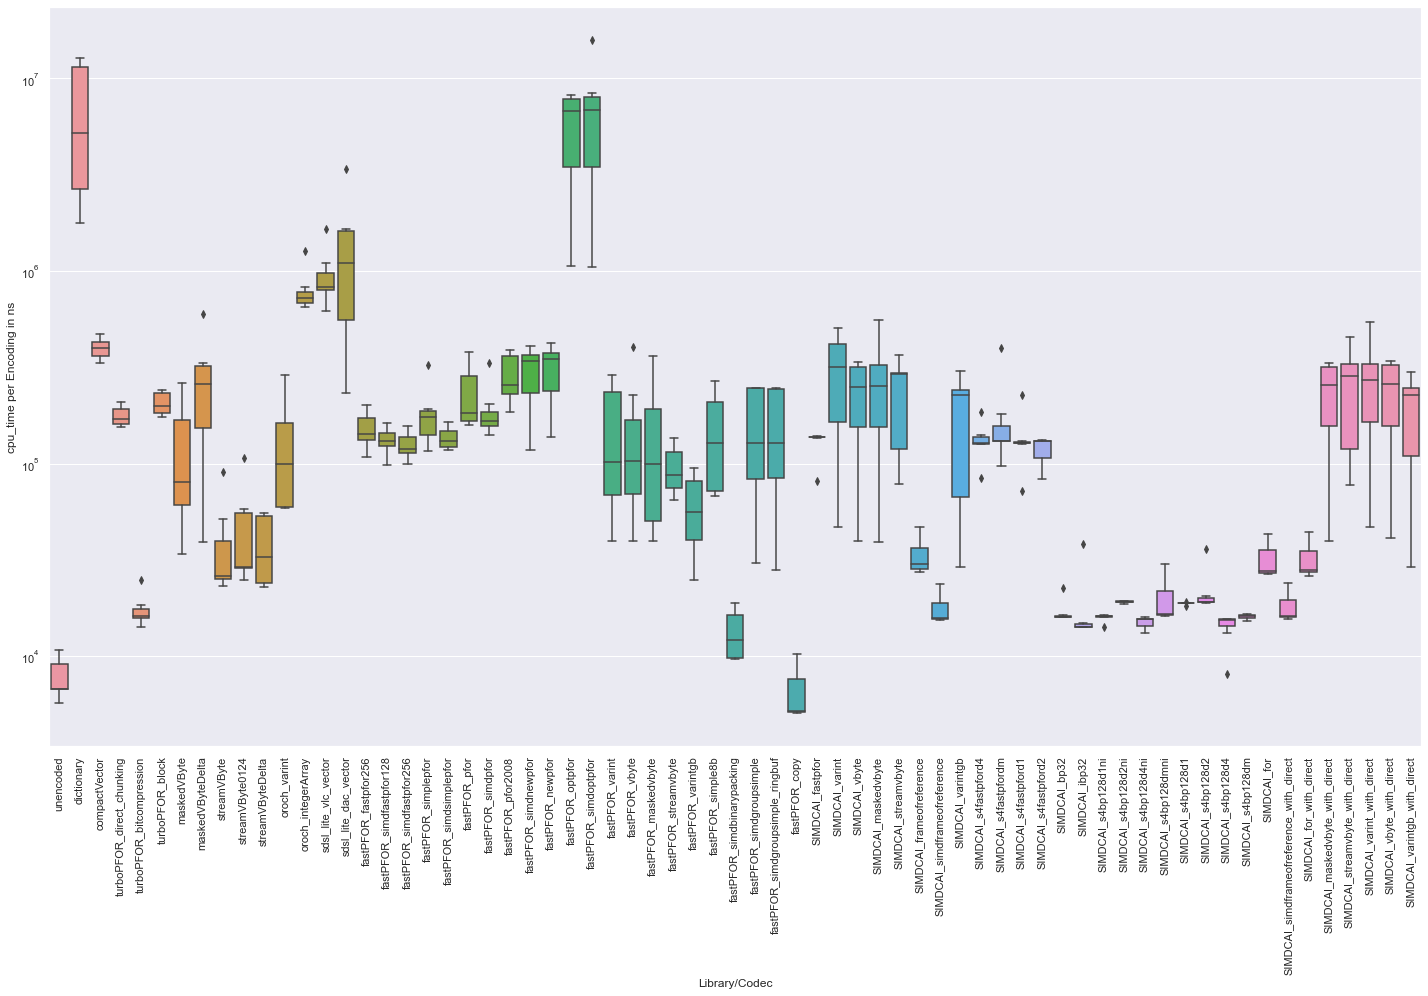

In [31]:
encoding: DataFrame = benchmark_speeds.loc[benchmark_speeds["process_type"] == "encoding"]
plot: sns.boxplot = sns.boxplot(data=encoding, x="library", y="cpu_time")

plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plot.set_yscale("log")
plt.tight_layout()
plot.set(
    xlabel='Library/Codec', 
    ylabel='cpu_time per Encoding in ns'
)
plt.savefig("visualizations/libraries_encoding.svg", format="svg")


## Encoding (interesting libs)

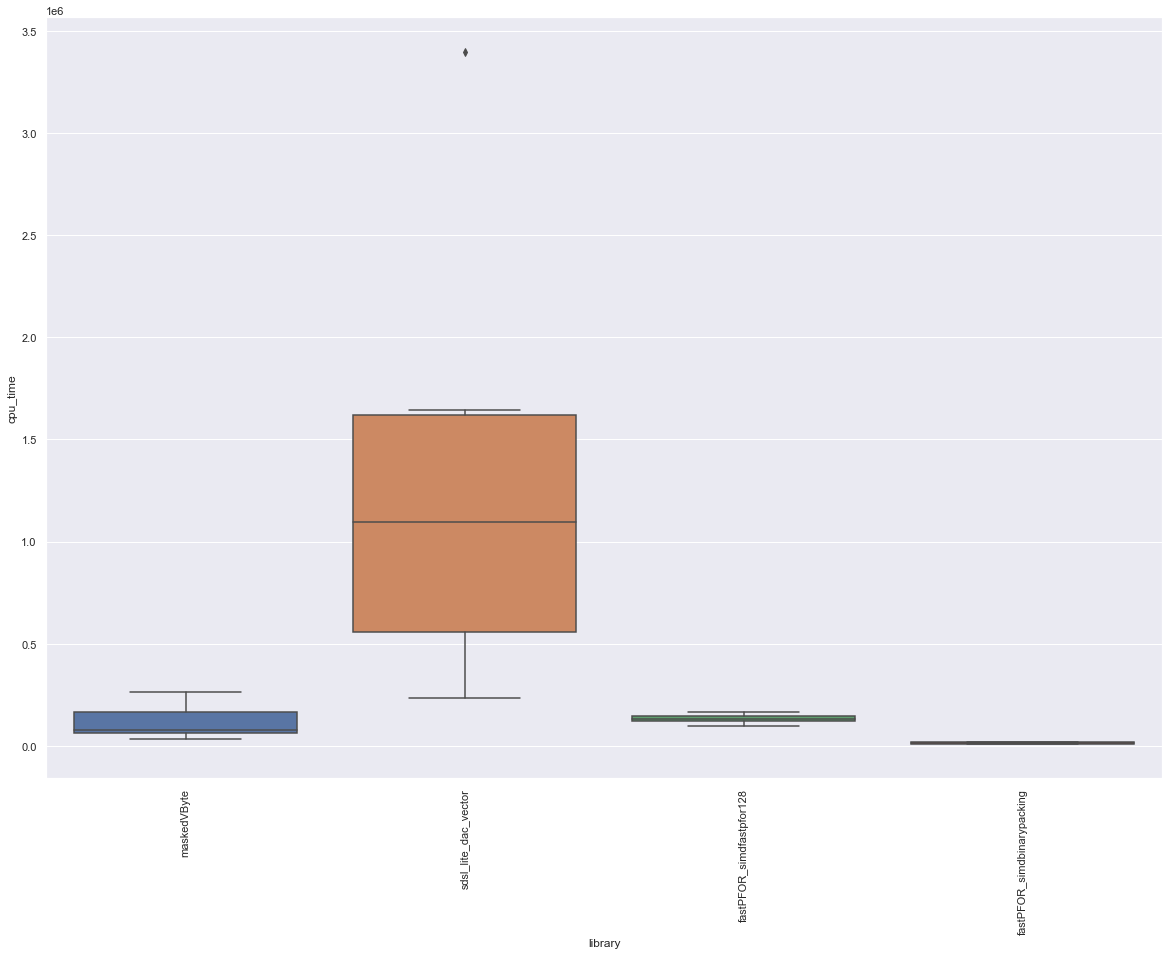

In [32]:
encoding: DataFrame = dataset_filtered.loc[dataset_filtered["process_type"] == "encoding"]
plot: sns.boxplot = sns.boxplot(data=encoding, x="library", y="cpu_time")
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plot.set_yscale("linear")

## Decoding

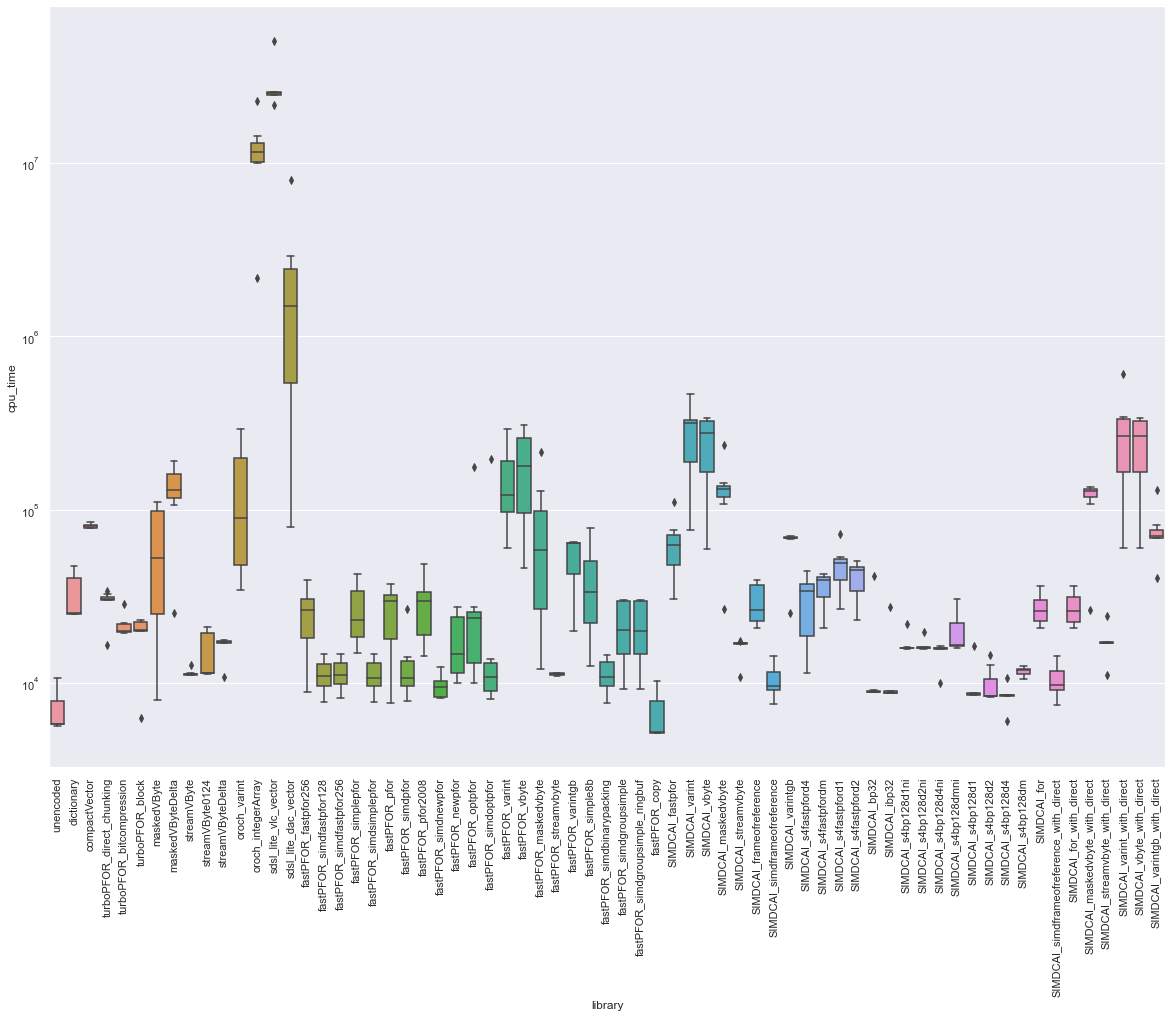

In [33]:
decoding: DataFrame = benchmark_speeds.loc[benchmark_speeds["process_type"] == "decoding"]
plot: sns.boxplot = sns.boxplot(data=decoding, x="library", y="cpu_time")
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plot.set_yscale("log")

## Decoding (only fastest below 10^4)

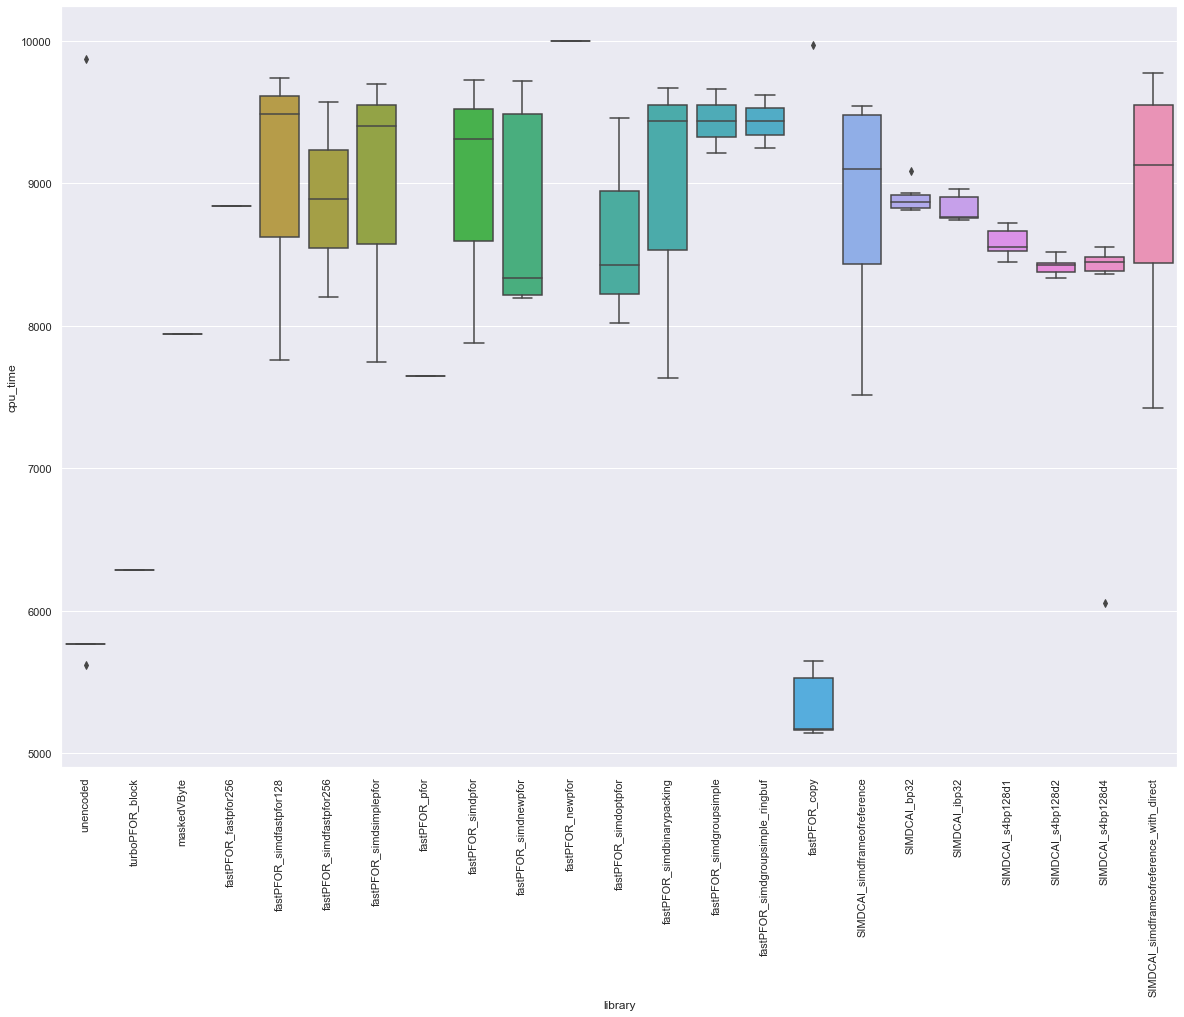

In [34]:
decoding: DataFrame = benchmark_speeds.loc[benchmark_speeds["process_type"] == "decoding"]
fastest_runtimes = decoding.loc[decoding["cpu_time"] < 10000]
plot: sns.boxplot = sns.boxplot(data=fastest_runtimes, x="library", y="cpu_time")
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plot.set_yscale("linear")

## Point based decoding

av_numbers


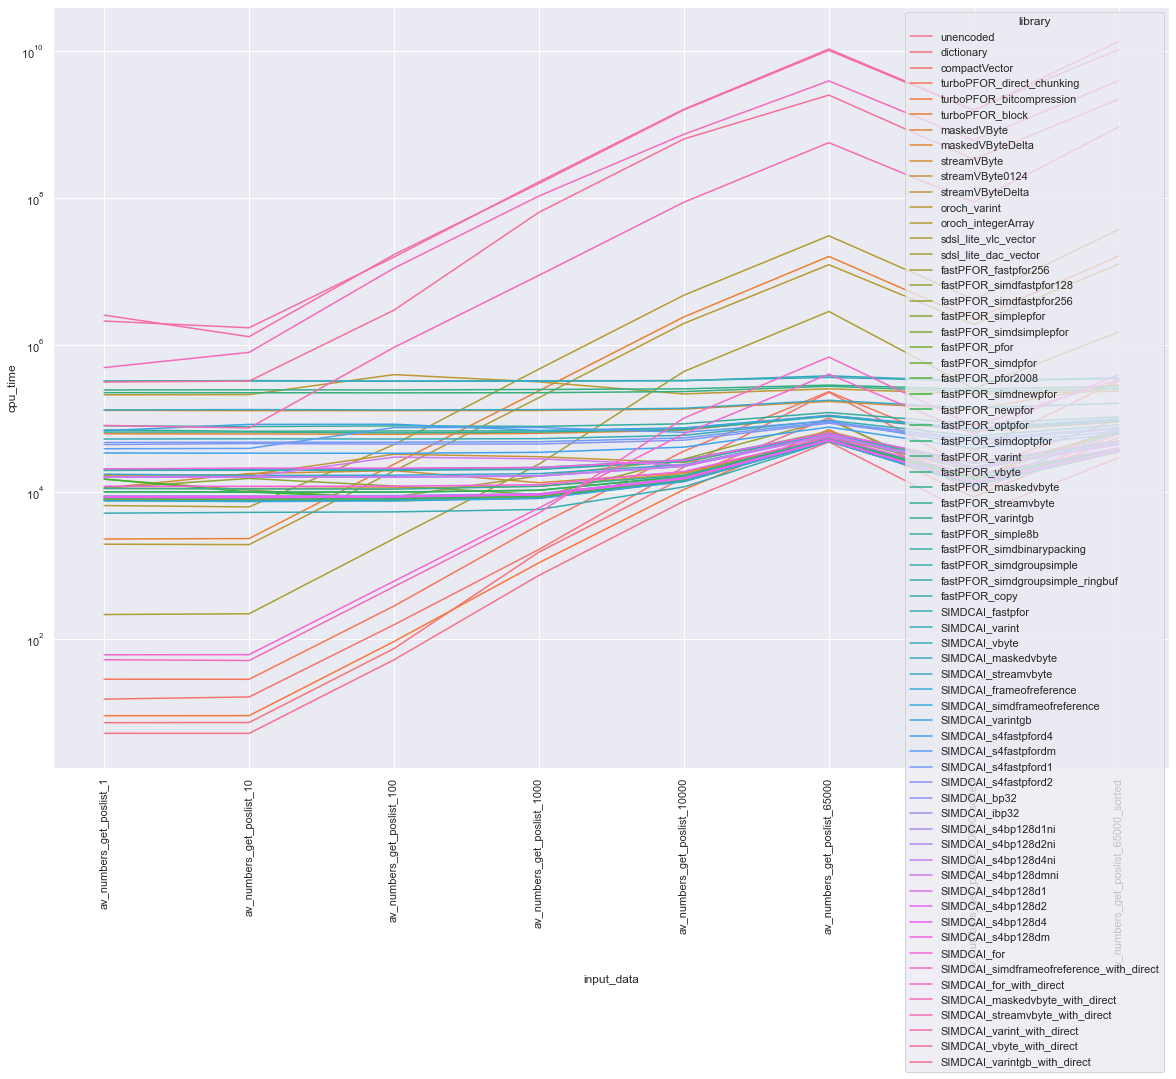

month_categorical


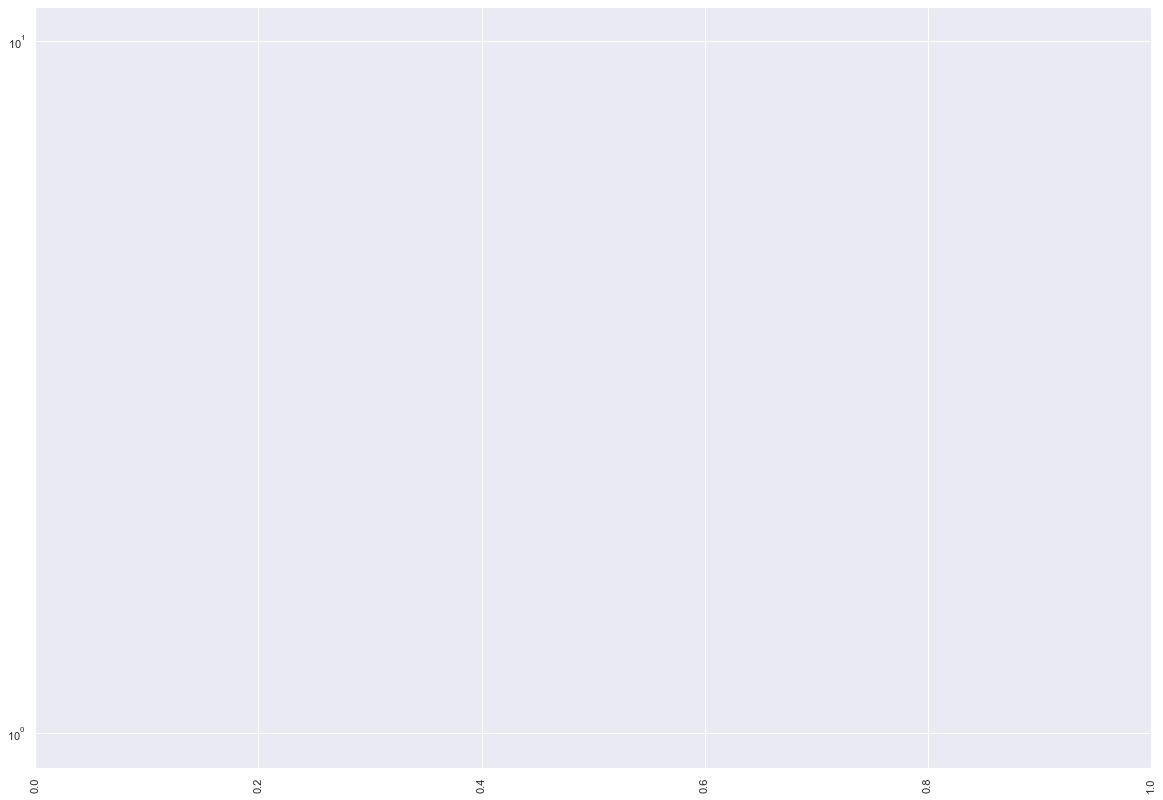

In [35]:
for data_distrib in ["av_numbers", "month_categorical"]:
    print(data_distrib)
    decoding_points: DataFrame = benchmark_speeds.loc[benchmark_speeds["process_type"] == "decoding_points_nocopy"]
    av_decoding_points = decoding_points[decoding_points["input_data"].str.contains(data_distrib)]
    plot: sns.lineplot = sns.lineplot(data=av_decoding_points, x="input_data", y="cpu_time", hue="library")
    plot.set_yscale("log")
    plt.draw()
    plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
    plt.show()



In [36]:
benchmark_speeds["library"].unique().shape

(67,)

## point decoding libs

fast random access libs:  ['unencoded', 'compactVector', 'turboPFOR_direct_chunking', 'turboPFOR_bitcompression', 'SIMDCAI_simdframeofreference_with_direct', 'SIMDCAI_for_with_direct']


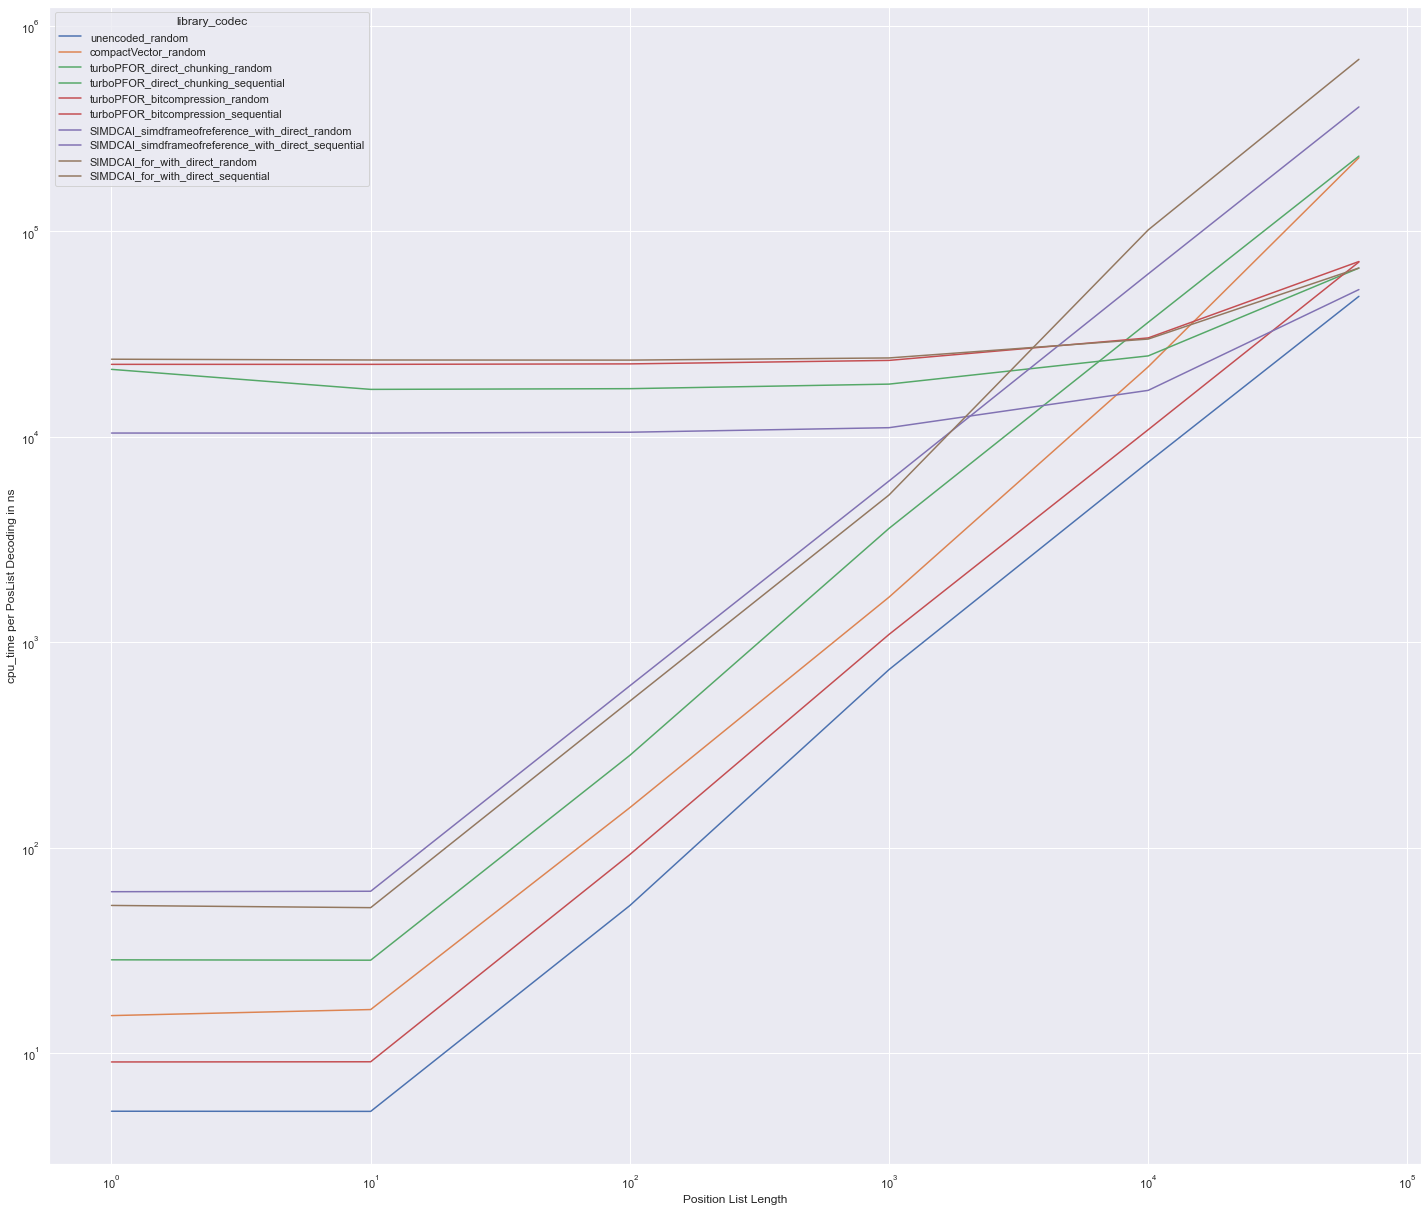

In [37]:

av_decoding_points = benchmark_speeds[benchmark_speeds["input_data"].str.contains("av_numbers")][~benchmark_speeds["input_data"].str.contains("sort")]

single_value_decodings = decoding_points[decoding_points["input_data"].str.fullmatch("av_numbers_get_poslist_1")]
fast_random_access_libs = list(single_value_decodings[single_value_decodings["cpu_time"] < 100]["library"])
fast_random_access_libs = [l for l in fast_random_access_libs if l != "dictionary"]
slow_random_access_libs = list(single_value_decodings[single_value_decodings["cpu_time"] > 1000000]["library"])
random_access_libs = fast_random_access_libs + slow_random_access_libs

av_decoding_points = av_decoding_points[av_decoding_points["process_type"].isin(["decoding_points_seq", "decoding_points_nocopy"])]
av_decoding_points["fancy_process_type"] = [p.replace("decoding_points_nocopy", "random").replace("decoding_points_seq", "sequential") for p in av_decoding_points["process_type"]]
av_decoding_points["library_codec"] = [lib + "_" + p for lib, p in zip(av_decoding_points["library"], av_decoding_points["fancy_process_type"])]

print("fast random access libs: ", fast_random_access_libs)
fastest_points = av_decoding_points.loc[av_decoding_points["name"].str.match(".*(" +  "|".join(fast_random_access_libs)  + ").*")]


def getPalette():
    unique_lib_names = list(fastest_points["library"].unique())
    lib_colors = dict(zip(unique_lib_names, sns.color_palette(n_colors=len(unique_lib_names))))

    codec_names = list(fastest_points["library_codec"])
    lib_names = list(fastest_points["library"])
    codec_to_lib = dict(zip(codec_names,lib_names))

    pal = {codec_name: lib_colors[codec_to_lib[codec_name]] for codec_name in codec_names}
    pal.update({"Total":"k"})
    return pal
pa = getPalette()
#print(pa)

sns.set(rc={'figure.figsize':(20,17)})

fastest_points["input_data_num"] = [int(l.split("get_poslist_")[1]) for l in fastest_points["input_data"]]
plot: sns.lineplot = sns.lineplot(data=fastest_points, x="input_data_num", y="cpu_time", hue="library_codec", palette=pa)
plt.draw()
#plot.set_xticks([0, 1, 2, 3, 4, 4.65])
#plot.set_xticklabels(['1', '10', '100', '1000', '10000', '65000'] ,rotation=0)
plot.set_xscale("log")
plot.set_yscale("log")
plt.tight_layout()
plot.set(
    xlabel='Position List Length', 
    ylabel='cpu_time per PosList Decoding in ns'
)
plt.savefig("visualizations/point_decoding_random_access_fastest.svg", format="svg")
#fastest_points["input_data_num"]

slow random access libs:  ['SIMDCAI_varint_with_direct', 'SIMDCAI_vbyte_with_direct']


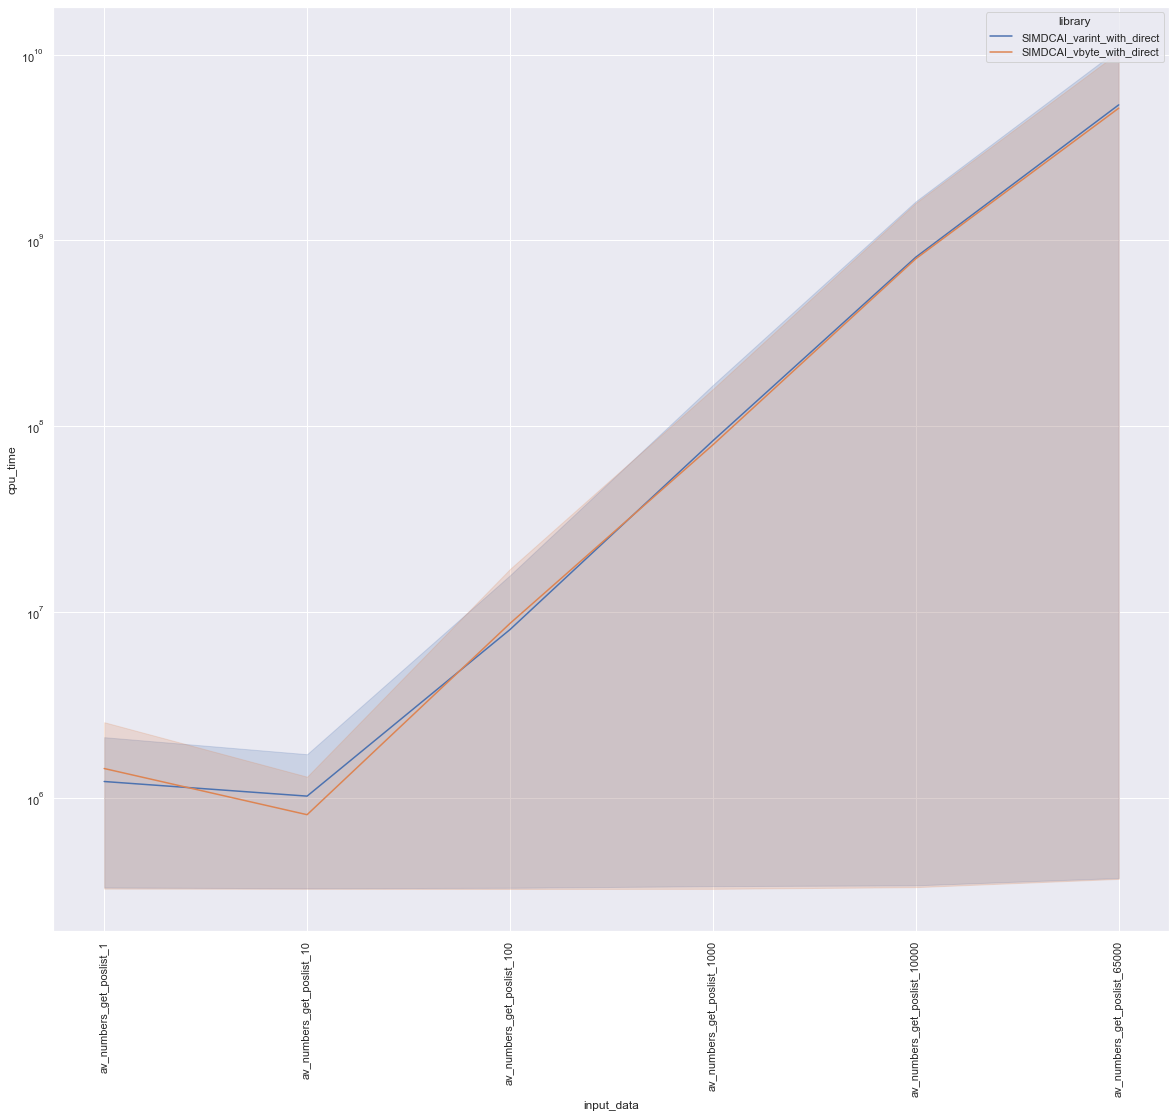

In [38]:
print("slow random access libs: ", slow_random_access_libs)
fastest_points_1 = av_decoding_points.loc[av_decoding_points["name"].str.match(".*(" +  "|".join(slow_random_access_libs)  + ").*")]
plot: sns.lineplot = sns.lineplot(data=fastest_points_1, x="input_data", y="cpu_time", hue="library")
plt.draw()
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plot.set_yscale("log")
plt.show()


random access libs:  ['unencoded', 'compactVector', 'turboPFOR_direct_chunking', 'turboPFOR_bitcompression', 'SIMDCAI_simdframeofreference_with_direct', 'SIMDCAI_for_with_direct', 'SIMDCAI_varint_with_direct', 'SIMDCAI_vbyte_with_direct']


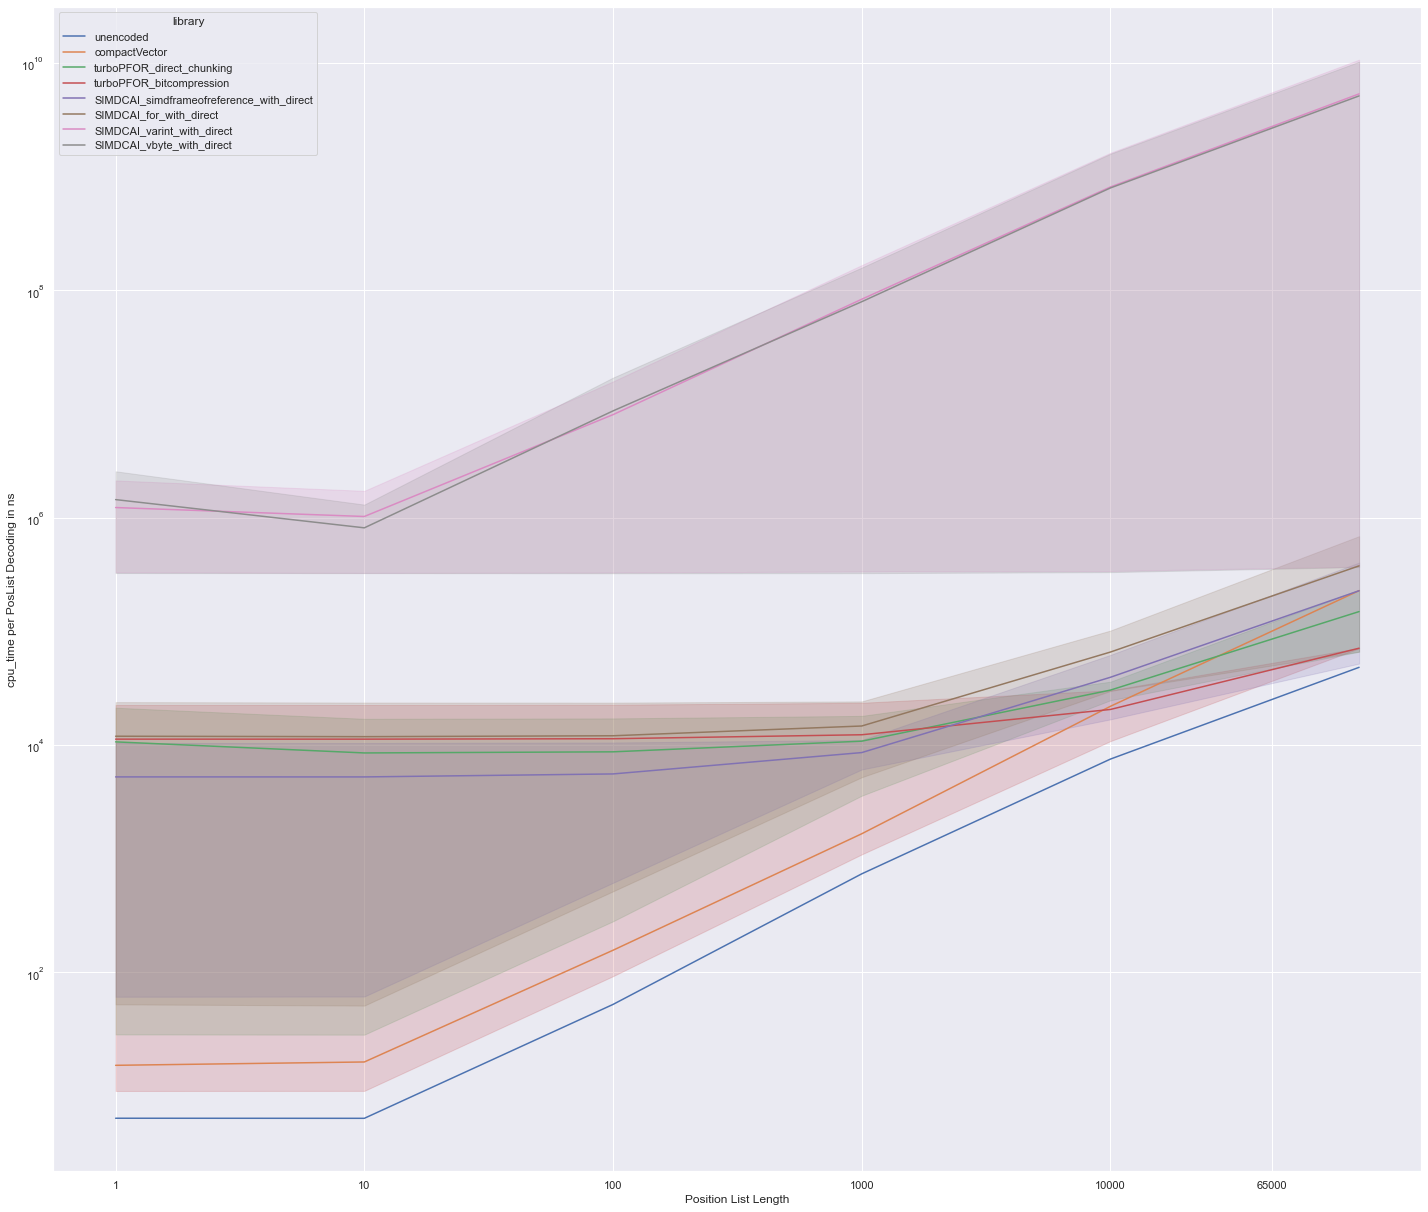

In [39]:
print("random access libs: ", random_access_libs)
fastest_points_2 = av_decoding_points.loc[av_decoding_points["name"].str.match(".*(" +  "|".join(random_access_libs)  + ").*")]
plot: sns.lineplot = sns.lineplot(data=fastest_points_2, x="input_data", y="cpu_time", hue="library")
plt.draw()
plot.set_xticks([0, 1, 2, 3, 4, 4.65])
plot.set_xticklabels(['1', '10', '100', '1000', '10000', '65000'] ,rotation=0)
plot.set_yscale("log")
plt.tight_layout()
plot.set(
    xlabel='Position List Length', 
    ylabel='cpu_time per PosList Decoding in ns'
)
plt.savefig("visualizations/point_decoding_random_access_all.svg", format="svg")


## Decoding Point Based (only random access libs, detailed view for accessing 10000 out of 65000 points)

av_numbers_get_poslist_10


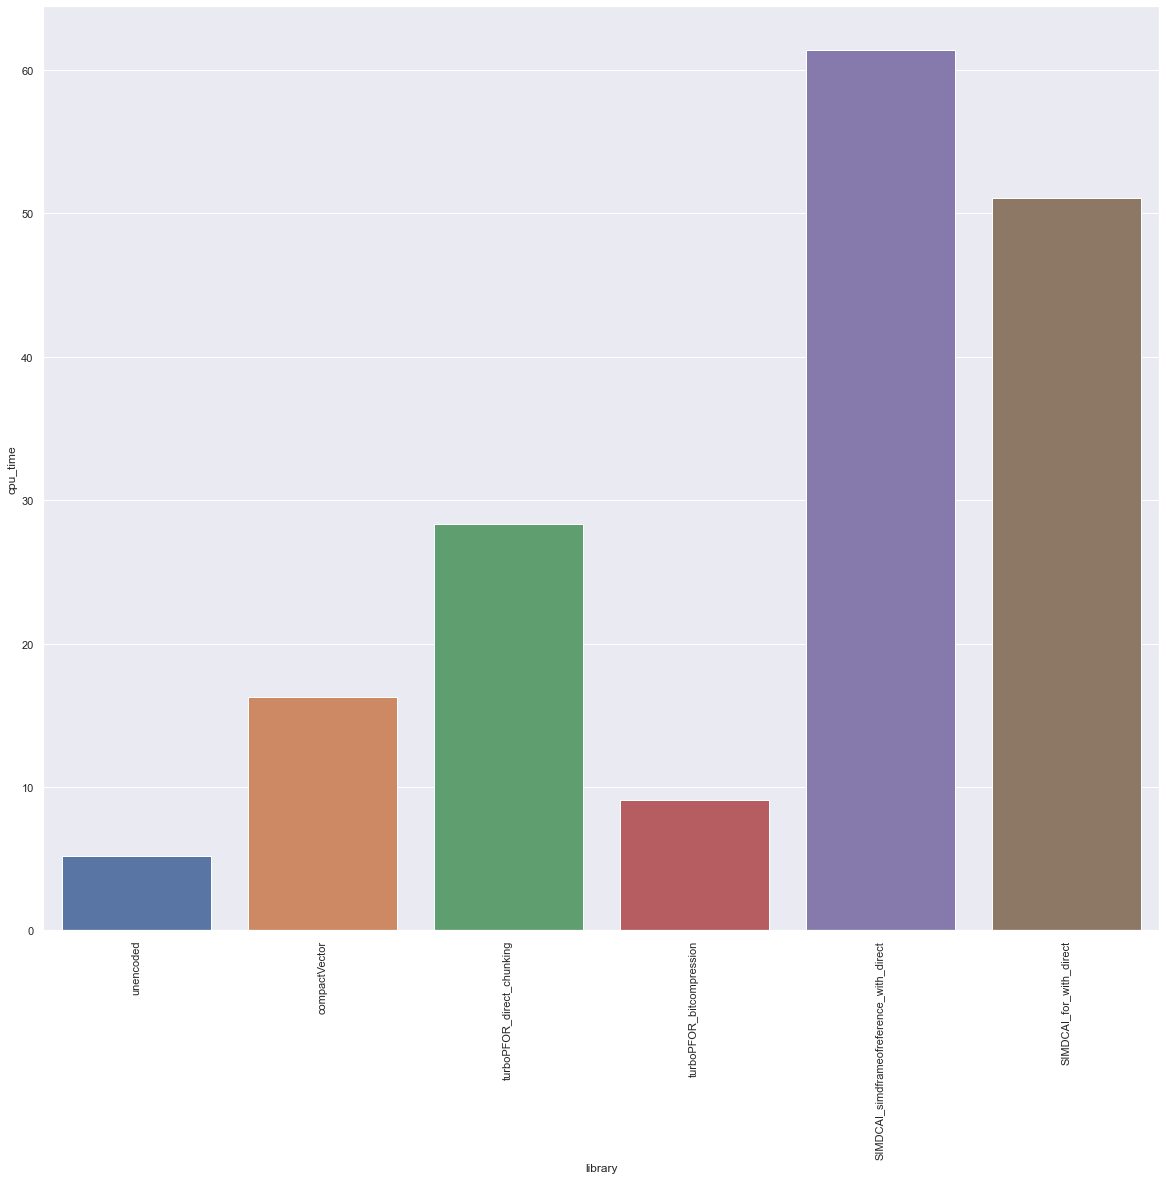

av_numbers_get_poslist_10000


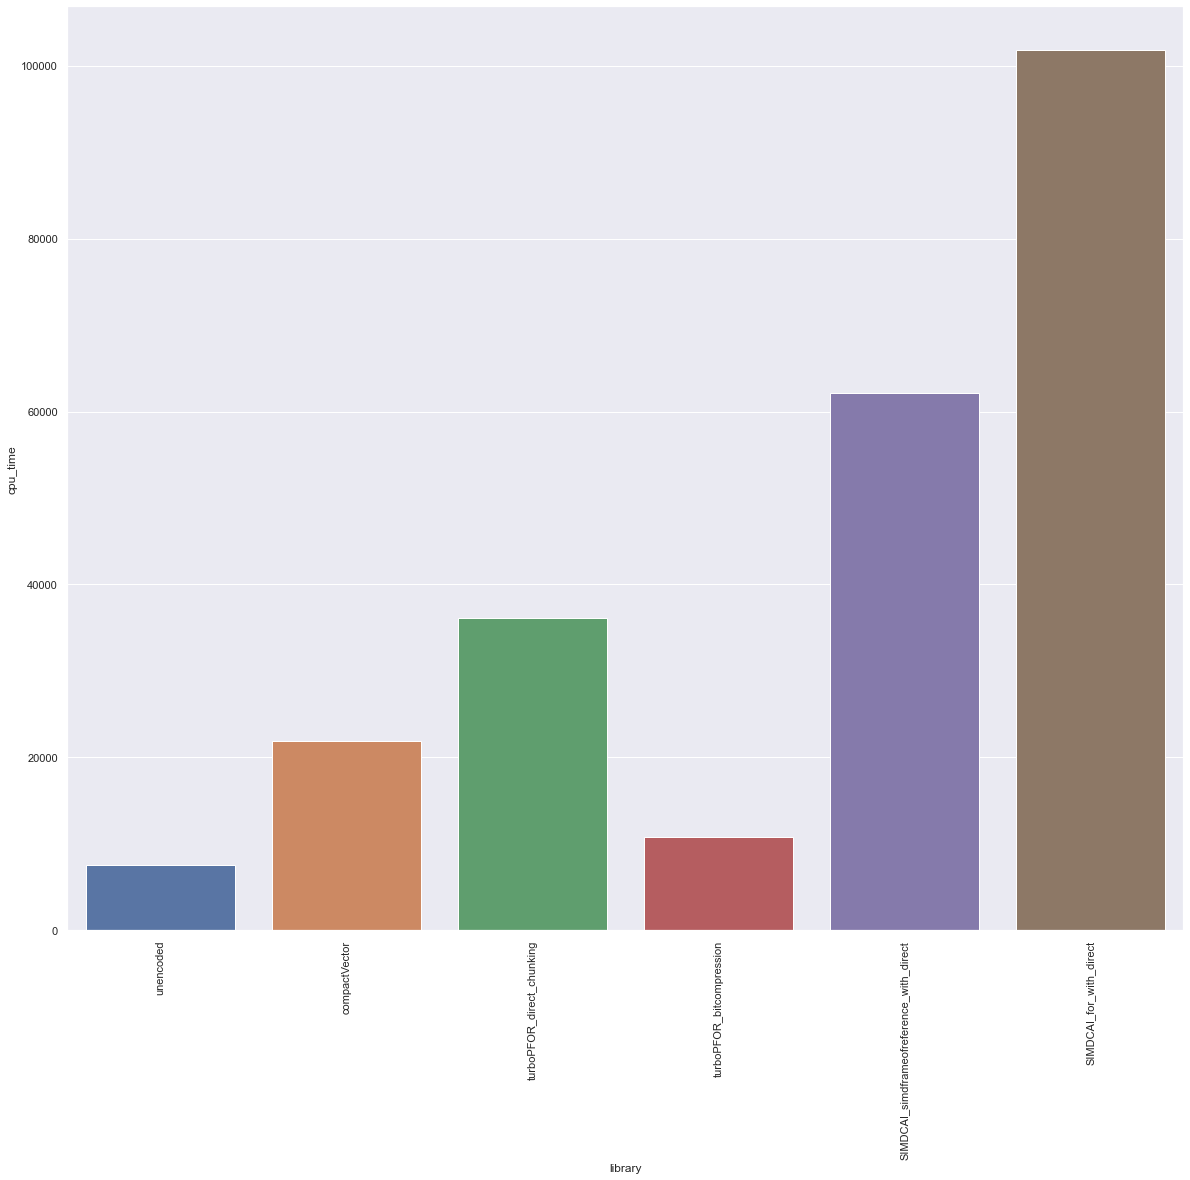

In [40]:
 for poslist_length in ["av_numbers_get_poslist_10", "av_numbers_get_poslist_10000"]:
    print(poslist_length)
    decoding_points: DataFrame = benchmark_speeds.loc[benchmark_speeds["process_type"].str.contains("decoding_points_nocopy")]
    fastest_points = decoding_points.loc[decoding_points["name"].str.match(".*(" +  "|".join(fast_random_access_libs)  + ").*")]
    fastest_points = fastest_points.loc[fastest_points["input_data"] == poslist_length]
    plot: sns.lineplot = sns.barplot(data=fastest_points, x="library", y="cpu_time")
    plot.set_yscale("linear")
    plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
    plt.show()


## Sequential decoding speed of random access libs

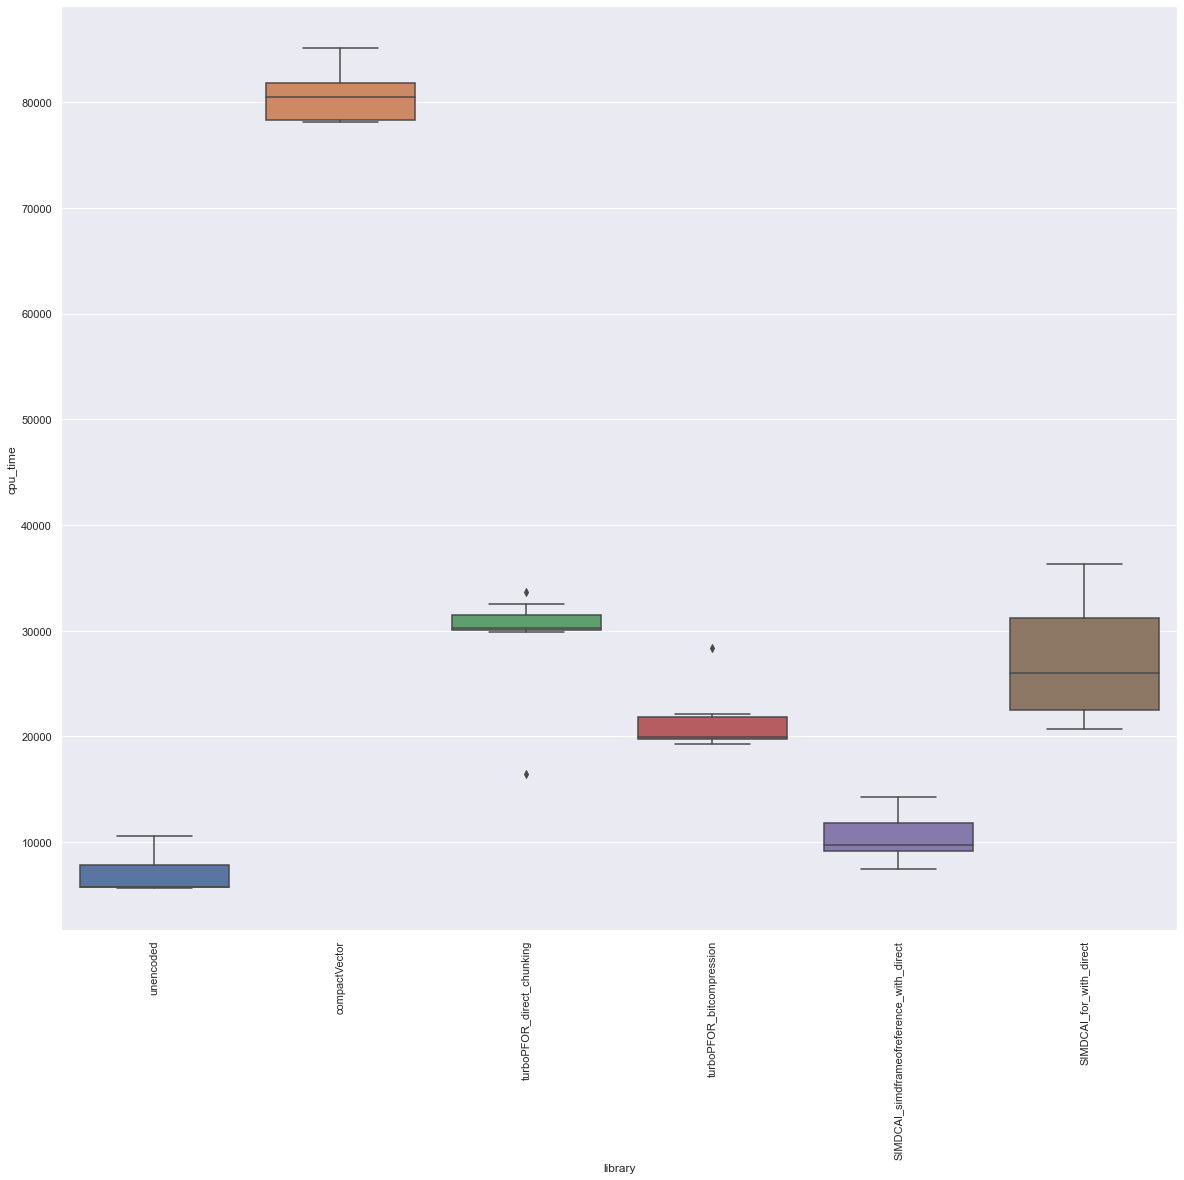

In [41]:
decoding: DataFrame = benchmark_speeds.loc[benchmark_speeds["process_type"] == "decoding"]
fastest_runtimes = decoding.loc[decoding["library"].str.match(".*(" +  "|".join(fast_random_access_libs)  + ").*")]
plot: sns.boxplot = sns.boxplot(data=fastest_runtimes, x="library", y="cpu_time")
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plot.set_yscale("linear")

## compression rates of fast random access libs (mean across all data distributions)

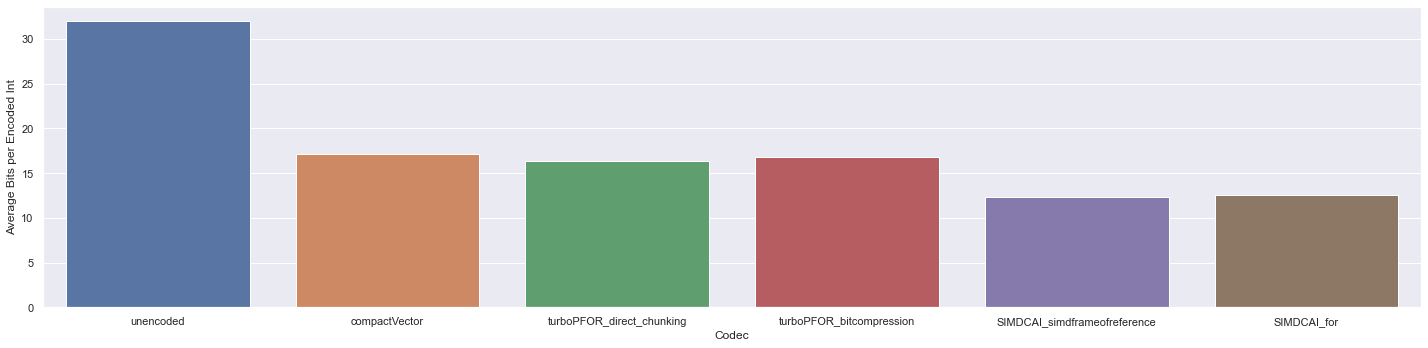

In [42]:
compression_stats: DataFrame = pd.read_csv(benchmark_compression_file)
compression_stats["name"] = [l.replace("SIMDCompressionAndIntersection", "SIMDCAI") for l in compression_stats["name"]]
compression_stats = compression_stats.loc[compression_stats["bitsPerInt"] != -1]

libs = [l.replace("_with_direct", "")for l in fast_random_access_libs]
fast_point_compression_stats = compression_stats.loc[compression_stats["name"].str.match(".*(" +  "|".join(libs)  + ").*")]

fast_point_compression_stats = fast_point_compression_stats[~fast_point_compression_stats["name"].str.match(".*with_select")]

def avgBitsPerInt(group):
    group["avgBitsPerInt"] = group["bitsPerInt"].mean()
    return group
fast_point_compression_stats = fast_point_compression_stats.groupby("name").apply(avgBitsPerInt)

sns.set(rc={'figure.figsize':(20,5)})

plot = sns.barplot(data=fast_point_compression_stats, x="name", y="avgBitsPerInt")
plot.set_xticklabels(plot.get_xticklabels(),rotation=0)


plt.tight_layout()
plot.set(
    xlabel='Codec', 
    ylabel='Average Bits per Encoded Int'
)
plt.savefig("point_decoding_bits_per_int_fastest.svg", format="svg")

# todo: sort by same order
# print(libs)
# fast_point_compression_stats

## compression rates of fast random access libs

<AxesSubplot:xlabel='dataName', ylabel='bitsPerInt'>

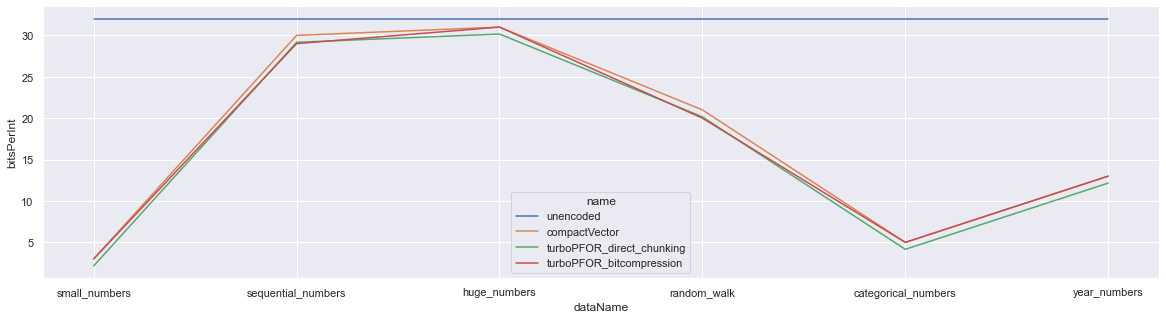

In [43]:
compression_stats: DataFrame = pd.read_csv(benchmark_compression_file)
compression_stats = compression_stats.loc[compression_stats["bitsPerInt"] != -1]
compression_stats = compression_stats.loc[compression_stats["name"].str.match(".*(" +  "|".join(fast_random_access_libs)  + ").*")]
sns.lineplot(data=compression_stats, x="dataName", y="bitsPerInt", hue="name")

## Compression

<AxesSubplot:xlabel='dataName', ylabel='bitsPerInt'>

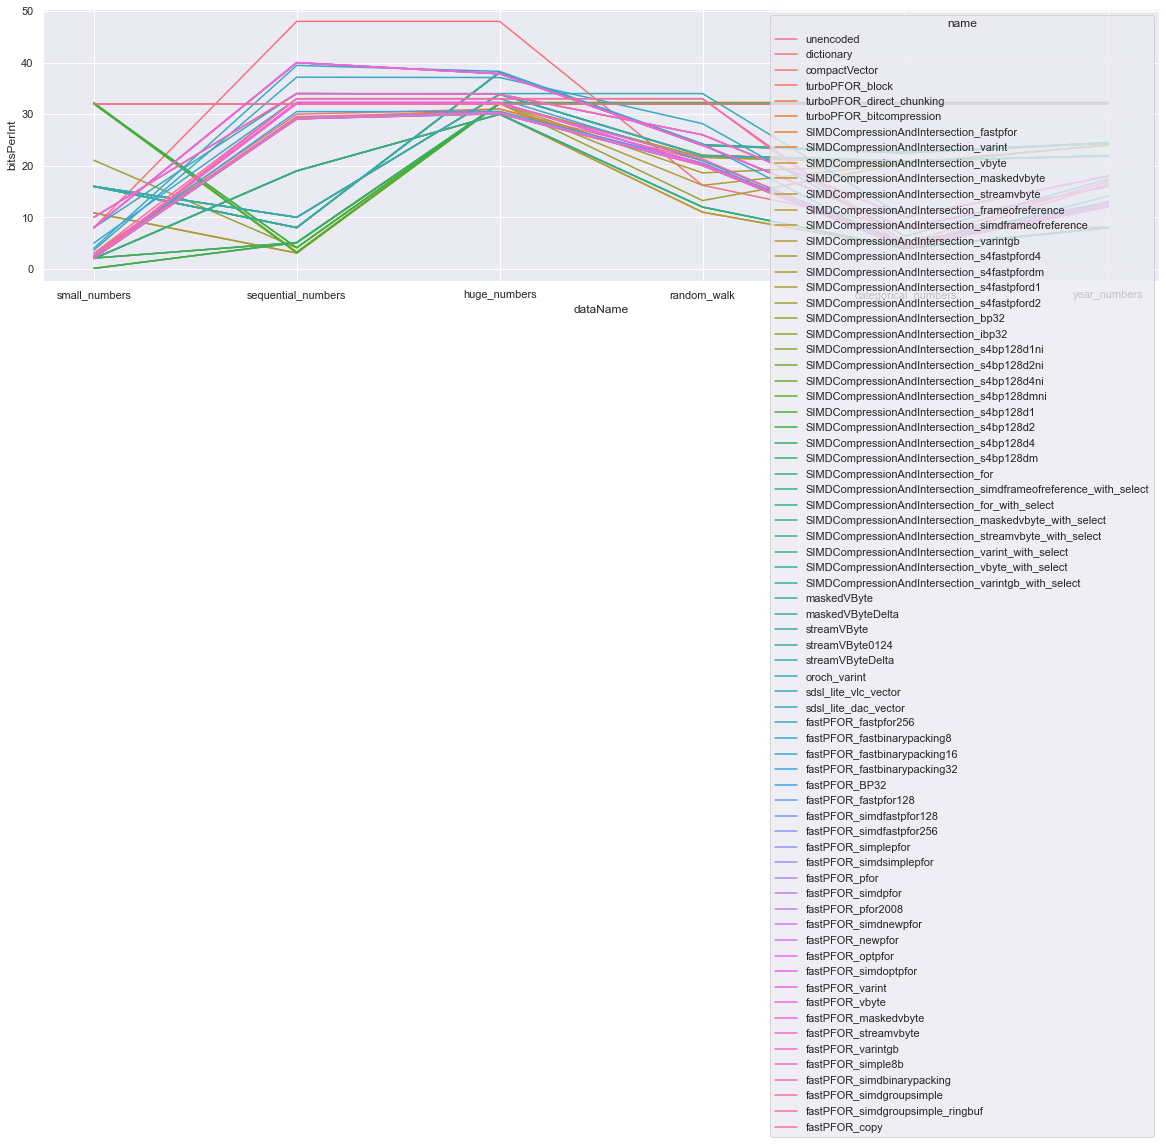

In [44]:
compression_stats: DataFrame = pd.read_csv(benchmark_compression_file)
compression_stats = compression_stats.loc[compression_stats["bitsPerInt"] != -1]
sns.lineplot(data=compression_stats, x="dataName", y="bitsPerInt", hue="name")

## Compression (only smallest)

<AxesSubplot:xlabel='dataName', ylabel='bitsPerInt'>

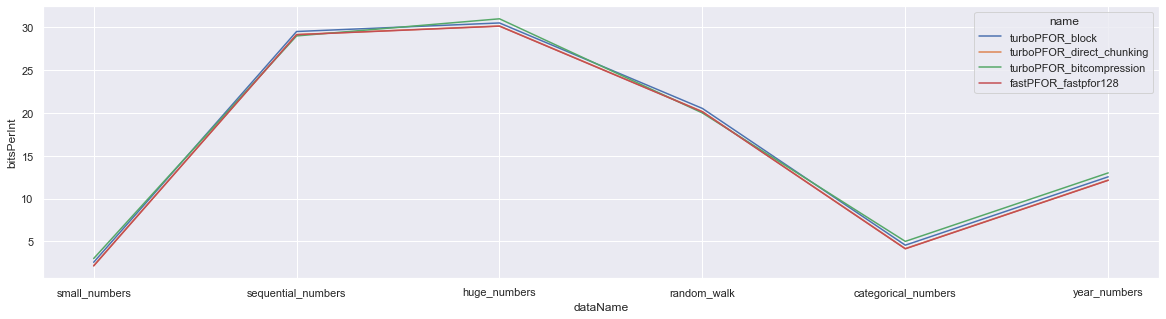

In [45]:
compression_stats: DataFrame = pd.read_csv(benchmark_compression_file)
compression_stats = compression_stats.loc[compression_stats["bitsPerInt"] != -1]
compression_stats = compression_stats.loc[compression_stats["name"].str.match(".*(fastPFOR_fastpfor128|turboPFOR).*")]

sns.lineplot(data=compression_stats, x="dataName", y="bitsPerInt", hue="name")

## Compression (interesting libs)

<AxesSubplot:xlabel='dataName', ylabel='bitsPerInt'>

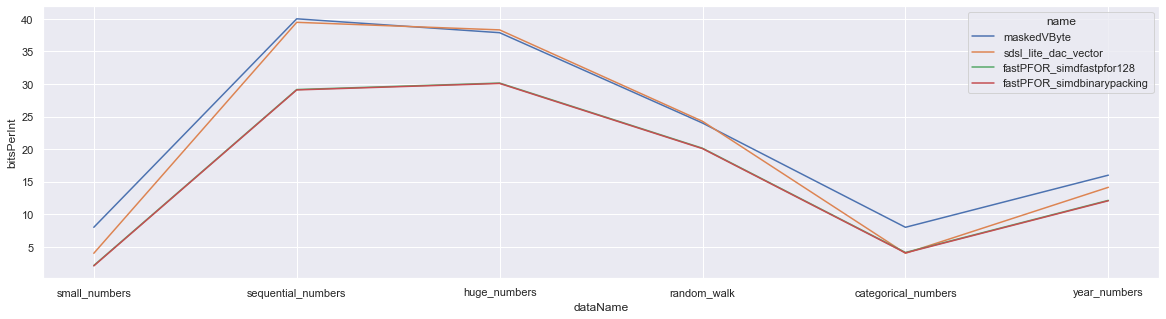

In [46]:
compression_stats: DataFrame = pd.read_csv(benchmark_compression_file)
compression_stats = compression_stats.loc[compression_stats["bitsPerInt"] != -1]
compression_stats_filtered = compression_stats.loc[compression_stats["name"].isin(dataset_filtered["library"])]
sns.lineplot(data=compression_stats_filtered, x="dataName", y="bitsPerInt", hue="name")

## Pareto

In [47]:
compression_stats["library"] = compression_stats["name"]
combined = benchmark_speeds.merge(compression_stats, left_on=["library", "input_data"], right_on=["library", "dataName"], how="inner")
combined = combined.loc[(combined["process_type"] == "encoding")] # we don't really care about encoding times (todo: proper weighting)

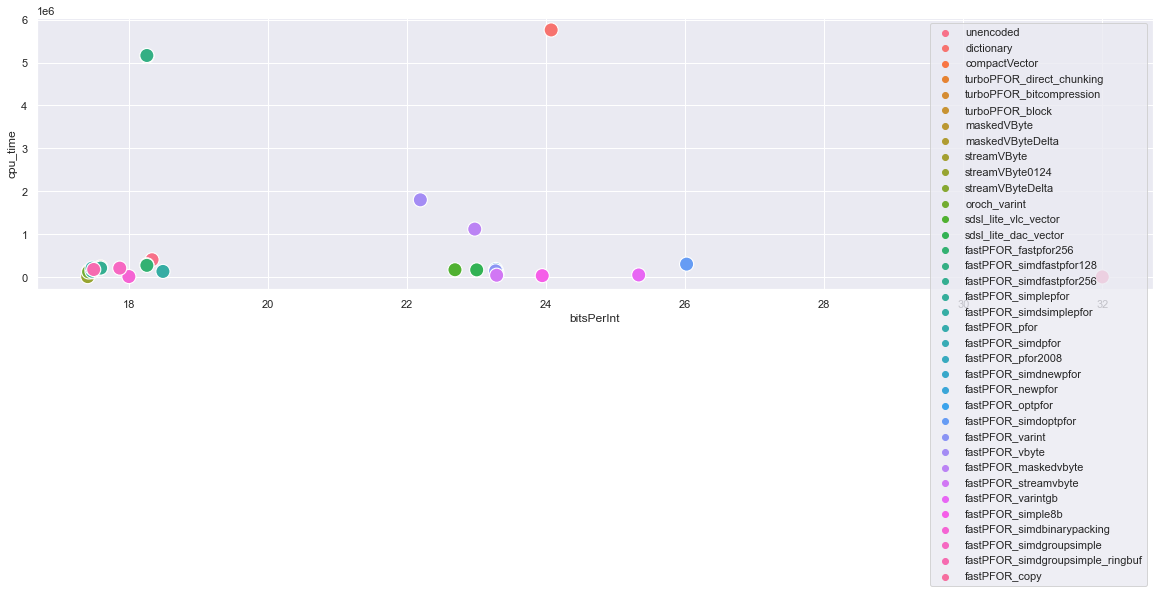

In [48]:
x = combined.groupby("library")['bitsPerInt'].mean()
y = combined.groupby("library")['cpu_time'].mean()
names = combined.library.unique()
plot = sns.scatterplot(x, y, hue=names, s=200)

## Pareto (interesting libs)

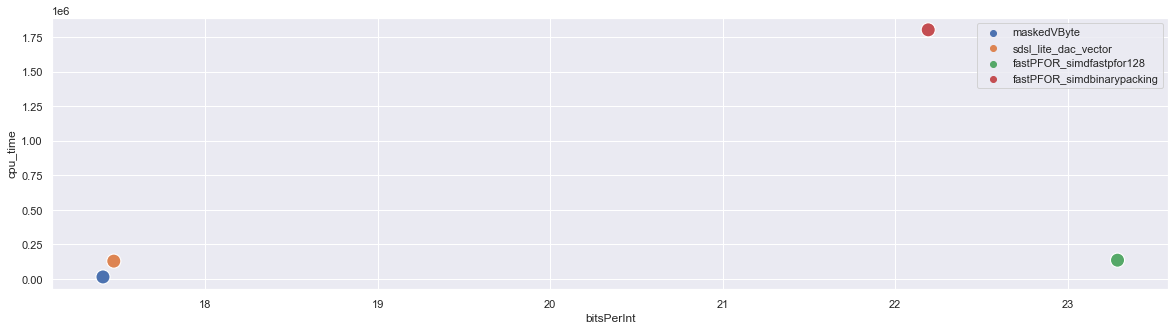

In [49]:
combined_filtered = combined.loc[(combined["library"].isin(most_interesting_libraries))]
x = combined_filtered.groupby("library")['bitsPerInt'].mean()
y = combined_filtered.groupby("library")['cpu_time'].mean()
plot = sns.scatterplot(x, y, hue=combined_filtered.library.unique(), s=200)

## Pareto (even more interesting libs :D)

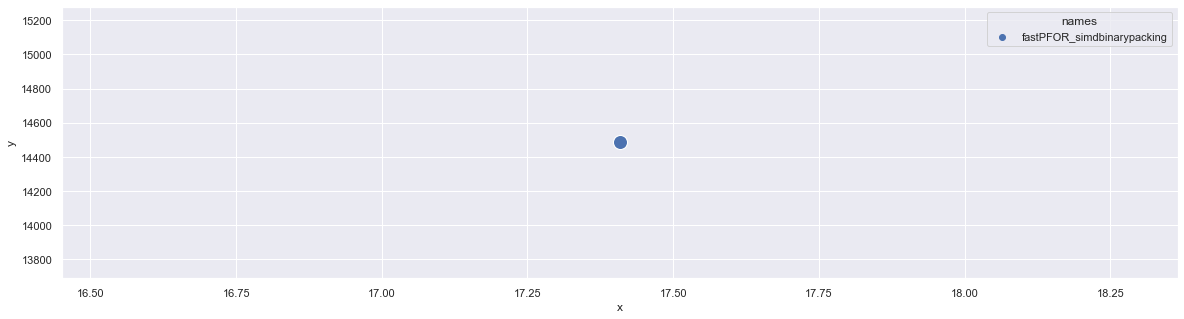

In [50]:
c = combined.groupby("library", sort=False)
x = c['bitsPerInt'].mean()
y = c['cpu_time'].mean()
names = combined.library.unique()
data = pd.DataFrame({"x": x, "y": y, "names": names})
data = data[data.x < 17.7]
data = data[data.y < 50000]
#data = data[data.names.str.contains("turbo")]
plot = sns.scatterplot(x=data.x, y=data.y, hue=data.names, s=200)


## Pareto (even more interesting libs :D)

In [68]:
c = combined.groupby("library", sort=False)
x = c['bitsPerInt'].mean()
y = c['cpu_time'].mean()
names = combined.library.unique()
data = pd.DataFrame({"bitsPerInt": x, "cpu_time": y, "names": names})
#data = data[data.names.str.contains("turbo")]
#plot = sns.scatterplot(x=data.x, y=data.y, hue=data.names, s=200)
data

bitsPerInt      cpu_time  \
library                                                      
unencoded                          32.000000  8.006070e+03   
dictionary                         24.073690  5.759040e+06   
compactVector                      18.333333  4.077423e+05   
turboPFOR_direct_chunking          17.494040  1.807813e+05   
turboPFOR_bitcompression           18.000000  1.643143e+04   
turboPFOR_block                    17.868693  2.127823e+05   
maskedVByte                        23.289400  1.358540e+05   
maskedVByteDelta                   26.021433  3.058719e+05   
streamVByte                        23.289467  4.690883e+04   
streamVByte0124                    25.332833  5.331483e+04   
streamVByteDelta                   23.945167  3.730540e+04   
oroch_varint                       23.274533  1.486033e+05   
sdsl_lite_vlc_vector               22.974490  1.121741e+06   
sdsl_lite_dac_vector               22.192053  1.803033e+06   
fastPFOR_fastpfor256               17.419170  1.400323e+05   
fastPFOR_simdfastpfor128           17.470700  1.289957e+05   
fastPFOR_simdfastpfor256           17.420663  1.250524e+05   
fastPFOR_simplepfor                17.470040  2.111750e+05   
fastPFOR_simdsimplepfor            17.469540  1.422920e+05   
fastPFOR_pfor                      17.593927  2.407197e+05   
fastPFOR_simdpfor                  17.593593  2.135603e+05   
fastPFOR_pfor2008                  17.594590  2.140290e+05   
fastPFOR_simdnewpfor               18.258530  2.771397e+05   
fastPFOR_newpfor                   18.258530  2.888690e+05   
fastPFOR_optpfor                   18.258863  5.148863e+06   
fastPFOR_simdoptpfor               18.258697  5.164450e+06   
fastPFOR_varint                    23.279433  1.550203e+05   
fastPFOR_vbyte                     23.277467  1.815702e+05   
fastPFOR_maskedvbyte               23.272367  1.667540e+05   
fastPFOR_streamvbyte               23.289900  1.014610e+05   
fastPFOR_varintgb                  23.289400  6.636627e+04   
fastPFOR_simple8b                  18.489617  1.356985e+05   
fastPFOR_simdbinarypacking         17.407993  1.448457e+04   
fastPFOR_simdgroupsimple           22.690107  1.748548e+05   
fastPFOR_simdgroupsimple_ringbuf   23.002560  1.718568e+05   
fastPFOR_copy                      32.000000  5.112943e+03   

                                                             names  
library                                                             
unencoded                                                unencoded  
dictionary                                              dictionary  
compactVector                                        compactVector  
turboPFOR_direct_chunking                turboPFOR_direct_chunking  
turboPFOR_bitcompression                  turboPFOR_bitcompression  
turboPFOR_block                                    turboPFOR_block  
maskedVByte                                            maskedVByte  
maskedVByteDelta                                  maskedVByteDelta  
streamVByte                                            streamVByte  
streamVByte0124                                    streamVByte0124  
streamVByteDelta                                  streamVByteDelta  
oroch_varint                                          oroch_varint  
sdsl_lite_vlc_vector                          sdsl_lite_vlc_vector  
sdsl_lite_dac_vector                          sdsl_lite_dac_vector  
fastPFOR_fastpfor256                          fastPFOR_fastpfor256  
fastPFOR_simdfastpfor128                  fastPFOR_simdfastpfor128  
fastPFOR_simdfastpfor256                  fastPFOR_simdfastpfor256  
fastPFOR_simplepfor                            fastPFOR_simplepfor  
fastPFOR_simdsimplepfor                    fastPFOR_simdsimplepfor  
fastPFOR_pfor                                        fastPFOR_pfor  
fastPFOR_simdpfor                                fastPFOR_simdpfor  
fastPFOR_pfor2008                                fastPFOR_pfor2008  
fastPFOR_simdnewpfor 

## Copy vs nocopy

In [69]:
c = combined.groupby("library", sort=False)
x = c['bitsPerInt'].mean()
y = c['cpu_time'].mean()
names = combined.library.unique()
data = pd.DataFrame({"x": x, "y": y, "names": names})
data = data[data.names.str.contains("turbo")]
plot = sns.scatterplot(x=data.x, y=data.y, hue=data.names, s=200)
# simdframeofreference_with_direct, simdfastpfor256

NameError: name 'simdframeofreference_with_direct' is not defined

In [54]:
benchmark_speeds["process_type"].unique()

array(['encoding', 'decoding', 'decoding_points',
       'decoding_points_nocopy', 'decoding_points_seq'], dtype=object)

In [62]:
a = benchmark_speeds[benchmark_speeds["input_data"] == "av_numbers_get_poslist_1"]
a["library"].unique()

array(['unencoded', 'dictionary', 'compactVector',
       'turboPFOR_direct_chunking', 'turboPFOR_bitcompression',
       'turboPFOR_block', 'maskedVByte', 'maskedVByteDelta',
       'streamVByte', 'streamVByte0124', 'streamVByteDelta',
       'oroch_varint', 'oroch_integerArray', 'sdsl_lite_vlc_vector',
       'sdsl_lite_dac_vector', 'fastPFOR_fastpfor256',
       'fastPFOR_simdfastpfor128', 'fastPFOR_simdfastpfor256',
       'fastPFOR_simplepfor', 'fastPFOR_simdsimplepfor', 'fastPFOR_pfor',
       'fastPFOR_simdpfor', 'fastPFOR_pfor2008', 'fastPFOR_simdnewpfor',
       'fastPFOR_newpfor', 'fastPFOR_optpfor', 'fastPFOR_simdoptpfor',
       'fastPFOR_varint', 'fastPFOR_vbyte', 'fastPFOR_maskedvbyte',
       'fastPFOR_streamvbyte', 'fastPFOR_varintgb', 'fastPFOR_simple8b',
       'fastPFOR_simdbinarypacking', 'fastPFOR_simdgroupsimple',
       'fastPFOR_simdgroupsimple_ringbuf', 'fastPFOR_copy',
       'SIMDCAI_fastpfor', 'SIMDCAI_varint', 'SIMDCAI_vbyte',
       'SIMDCAI_maskedvbyte', 

In [65]:
a[a["library"] == "compactVector"]

name  iterations  real_time  \
74  BenchmarkColumnCompressionFixture/compactVecto...    33139436    15.8430   
82  BenchmarkColumnCompressionFixture/compactVecto...    48195514    15.2287   

    cpu_time time_unit  bytes_per_second  items_per_second  label  \
74   15.8428        ns               NaN               NaN    NaN   
82   15.2287        ns               NaN               NaN    NaN   

    error_occurred  error_message                input_data        library  \
74             NaN            NaN  av_numbers_get_poslist_1  compactVector   
82             NaN            NaN  av_numbers_get_poslist_1  compactVector   

              process_type            lib  
74         decoding_points  compactVector  
82  decoding_points_nocopy  compactVector

In [66]:
combined

name_x  iterations  \
0    BenchmarkColumnCompressionFixture/unencoded_be...       66284   
2    BenchmarkColumnCompressionFixture/unencoded_be...       72274   
4    BenchmarkColumnCompressionFixture/unencoded_be...      123177   
6    BenchmarkColumnCompressionFixture/dictionary_b...         709   
8    BenchmarkColumnCompressionFixture/dictionary_b...          55   
..                                                 ...         ...   
206  BenchmarkColumnCompressionFixture/fastPFOR_sim...        2853   
208  BenchmarkColumnCompressionFixture/fastPFOR_sim...        2871   
210  BenchmarkColumnCompressionFixture/fastPFOR_cop...      137979   
212  BenchmarkColumnCompressionFixture/fastPFOR_cop...      138186   
214  BenchmarkColumnCompressionFixture/fastPFOR_cop...      138256   

       real_time     cpu_time time_unit  bytes_per_second  items_per_second  \
0       10695.90     10695.70        ns               NaN               NaN   
2        7651.63      7651.28        ns               NaN               NaN   
4        5671.32      5671.23        ns               NaN               NaN   
6     1782490.00   1782360.00        ns               NaN               NaN   
8    12843500.00  12843600.00        ns               NaN               NaN   
..           ...          ...       ...               ...               ...   
206    244522.00    244513.00        ns               NaN               NaN   
208    242994.00    242989.00        ns               NaN               NaN   
210      5071.62      5071.47        ns               NaN               NaN   
212      5159.22      5158.97        ns               NaN               NaN   
214      5108.33      5108.39        ns               NaN               NaN   

     label  error_occurred  error_message     input_data  \
0      NaN             NaN            NaN  small_numbers   
2      NaN             NaN            NaN   huge_numbers   
4      NaN             NaN            NaN    random_walk   
6      NaN             NaN            NaN  small_numbers   
8      NaN             NaN            NaN   huge_numbers   
..     ...             ...            ...            ...   
206    NaN             NaN            NaN   huge_numbers   
208    NaN             NaN            NaN    random_walk   
210    NaN             NaN            NaN  small_numbers   
212    NaN             NaN            NaN   huge_numbers   
214    NaN             NaN            NaN    random_walk   

                              library process_type         lib  \
0                           unencoded     encoding   unencoded   
2                           unencoded     encoding   unencoded   
4                           unencoded     encoding   unencoded   
6                          dictionary     encoding  dictionary   
8                          dictionary     encoding  dictionary   
..                                ...          ...         ...   
206  fastPFOR_simdgroupsimple_ringbuf     encoding    fastPFOR   
208  fastPFOR_simdgroupsimple_ringbuf     encoding    fastPFOR   
210                     fastPFOR_copy     encoding    fastPFOR   
212                     fastPFOR_copy     encoding    fastPFOR   
214                     fastPFOR_copy     encoding    fastPFOR   

                               name_y       dataName  bitsPerInt  
0                           unencoded  small_numbers    32.00000  
2                           unencoded   huge_numbers    32.00000  
4                           unencoded    random_walk    32.00000  
6                          dictionary  small_numbers     8.00197  
8                          dictionary   huge_numbers    47.99950  
..                                ...            ...         ...  
206  fastPFOR_simdgroupsimple_ringbuf   huge_numbers    33.00230  
208  fastPFOR_simdgroupsimple_ringbuf    random_walk    33.00230  
210                     fastPFOR_copy  small_numbers    32.00000  
212                     fastPFOR_copy   huge_numbers    32.00000  
214    

In [71]:
compression_stats.name.unique()

array(['unencoded', 'dictionary', 'compactVector', 'turboPFOR_block',
       'turboPFOR_direct_chunking', 'turboPFOR_bitcompression',
       'SIMDCompressionAndIntersection_fastpfor',
       'SIMDCompressionAndIntersection_varint',
       'SIMDCompressionAndIntersection_vbyte',
       'SIMDCompressionAndIntersection_maskedvbyte',
       'SIMDCompressionAndIntersection_streamvbyte',
       'SIMDCompressionAndIntersection_frameofreference',
       'SIMDCompressionAndIntersection_simdframeofreference',
       'SIMDCompressionAndIntersection_varintgb',
       'SIMDCompressionAndIntersection_s4fastpford4',
       'SIMDCompressionAndIntersection_s4fastpfordm',
       'SIMDCompressionAndIntersection_s4fastpford1',
       'SIMDCompressionAndIntersection_s4fastpford2',
       'SIMDCompressionAndIntersection_bp32',
       'SIMDCompressionAndIntersection_ibp32',
       'SIMDCompressionAndIntersection_s4bp128d1ni',
       'SIMDCompressionAndIntersection_s4bp128d2ni',
       'SIMDCompressionAndInte

In [79]:
from scipy.stats.mstats import gmean
for c in ["SIMDCompressionAndIntersection_simdframeofreference", "turboPFOR_direct_chunking", "turboPFOR_bitcompression", "compactVector", "oroch_varint", "unencoded", "fastPFOR_fastpfor256", "maskedVByte", "streamVByte"]:
    bpi = compression_stats[compression_stats["name"] == c]["bitsPerInt"]
    m = gmean(bpi)
    print(c, m / 32.0)

SIMDCompressionAndIntersection_simdframeofreference 0.26849784432805923
turboPFOR_direct_chunking 0.34888195169272523
turboPFOR_bitcompression 0.3851714348929852
compactVector 0.39051659815501066
oroch_varint 0.5709161962598837
unencoded 1.0
fastPFOR_fastpfor256 0.3448920037540967
maskedVByte 0.571028341239267
streamVByte 0.6073465890315238
